In [98]:
{
    "id": 21441,
    "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing, meat and skin with breading",
    "tags": ["KFC"],
    "manufacturer": "Kentucky Fried Chicken",
    "group": "Fast Foods",
    "portions": [
        {
            "amount": 1,
            "unit": "wing, with skin",
            "grams": 68.0
        },
        ...
    ],
    "nutrients": [
        {
            "value": 20.8,
            "units": "g",
            "description": "Protein",
            "group": "Composition"
        },
        ...
    ]
}

{'id': 21441,
 'description': 'KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing, meat and skin with breading',
 'tags': ['KFC'],
 'manufacturer': 'Kentucky Fried Chicken',
 'group': 'Fast Foods',
 'portions': [{'amount': 1, 'unit': 'wing, with skin', 'grams': 68.0},
  Ellipsis],
 'nutrients': [{'value': 20.8,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  Ellipsis]}

In [99]:
# 각 음식은 숫자로 된 고유 ID 뿐만 아니라 영양소와 제공량 등 두 가지 리스트를 가지고 있다.
# 이러한 형식의 데이터는 분석하기 편하지 않으므로 좀 더 나은 형태로 바꾼다.

In [100]:
import json
db = json.load(open('C:/Users/user/Desktop/pydata-book-2nd-edition/pydata-book-2nd-edition/datasets/usda_food/database.json'))

In [101]:
len(db)

6636

In [102]:
db[1]

{'id': 1009,
 'description': 'Cheese, cheddar',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'cup, diced', 'grams': 132.0},
  {'amount': 2, 'unit': 'cup, melted', 'grams': 244.0},
  {'amount': 3, 'unit': 'cup, shredded', 'grams': 113.0},
  {'amount': 4, 'unit': 'oz', 'grams': 28.35},
  {'amount': 5, 'unit': 'cubic inch', 'grams': 17.0},
  {'amount': 6, 'unit': 'slice (1 oz)', 'grams': 28.0}],
 'nutrients': [{'value': 24.9,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 33.14,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 1.28,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.93, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 403.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 0.24, 'units': 'g', 'description': 'Sucrose', 'g

In [103]:
# db에 있는 각 엔트리는 한 가지 음식에 대한 모든 정보를 담고 있는 사전형이다.
# 'nutrients' 필드는 사전의 리스트이며 각 항목은 한 가지 영양소에 대한 정보를 담고있다.

In [104]:
db[0].keys()

# db의 0번째 값의 key 값들을 전부 가져온다.

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [105]:
db[0]['nutrients'][0]

# db 0번쨰 값의 nutrients 값의 0번째 값을 가져온다.

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [106]:
import pandas as pd

nutrients = pd.DataFrame(db[0]['nutrients'])

# db 의 0번째 인덱스에 있는 nutrients 를  nutrients 변수에 할당한다.

In [107]:
print(nutrients)

# 키 nutrients 는 값 162 개를 갖고 있다.  

       value units                         description        group
0     25.180     g                             Protein  Composition
1     29.200     g                   Total lipid (fat)  Composition
2      3.060     g         Carbohydrate, by difference  Composition
3      3.280     g                                 Ash        Other
4    376.000  kcal                              Energy       Energy
..       ...   ...                                 ...          ...
157    1.472     g                              Serine  Amino Acids
158   93.000    mg                         Cholesterol        Other
159   18.584     g        Fatty acids, total saturated        Other
160    8.275     g  Fatty acids, total monounsaturated        Other
161    0.830     g  Fatty acids, total polyunsaturated        Other

[162 rows x 4 columns]


In [108]:
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [109]:
# 사전의 리스트를 DataFrame 으로 바꿀 때 추출할 필드 목록을 지정해줄 수 있다.
# 우리는 음식의 이름과 그룹, id 그리고 제조사를 추출한다.

In [110]:
info_keys = ['description', 'group', 'id', 'manufacturer']
# 컬럼 4개를 만들어 info_keys 에 할당한다.
info = pd.DataFrame(db, columns=info_keys)
# db 의 DataFrame 을 만드는데 컬럼 기준은 위에서 만든 info_keys

info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [111]:
info.info()

# 컬럼 4개의 값을 보여줌
# manufacturer 만 전체 값에서 누락된 부분이 보이고
# DataType 은 id 만 int 고 나머지는 object 임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [112]:
# value_counts 메서드를 이용해서 음식 그룹의 분포를 확인할 수 있다.

In [113]:
pd.value_counts(info.group)[:10]

# info.group 에 있는 값들을 value_counts 를 적용해
# 각 element 가 몇개씩 있는지 counts 함수로 세어준다.

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [114]:
print(info.group)

0            Dairy and Egg Products
1            Dairy and Egg Products
2            Dairy and Egg Products
3            Dairy and Egg Products
4            Dairy and Egg Products
                   ...             
6631    Sausages and Luncheon Meats
6632    Sausages and Luncheon Meats
6633                     Baby Foods
6634                     Baby Foods
6635                     Baby Foods
Name: group, Length: 6636, dtype: object


In [115]:
# 모든 영양소를 분석해보자. 좀 더 쉬운 분석을 위해 각 음식의 영양소 정보를
# 거대한 테이블 하나에 담아보자. 그러러면 사전에 몇 가지 과정을 거쳐야 하는데
# 먼저 음식의 영야소 리스트를 하나의 DataFrame 으로 변환하고,
# 음식ㄱ의 id를 위한 컬럼을 하나 추가한다.
# 또한 이 DataFrame 을 리스트에 추가한다. 
# 그리고 마지막으로 이 리스트를 concat 메서드를 사용해서 하나로 합친다.

In [116]:
nutrients = []
# nutients 변수를 만들고 빈 리스트를 만들어 둔다.

for rec in db:
    # db의 파일은 하나씩 rec 에 넣을거다.
    fnuts = pd.DataFrame(rec['nutrients'])
    # db 에서 rec 으로 받은 파일 하나의 nutrients 인덱스를 빼서 fnuts 에 넣는다. 반복 
    fnuts['id'] = rec['id']
    # fnuts 변수에 id 컬럼을 만든다. rec 에 만든것과 같은 의미
    nutrients.append(fnuts)
    # nutriets 에 fnuts 값을 append 로 뒤에서부터 하나씩 넣는다. 즉 id 값이 생긴다.

nutrients = pd.concat(nutrients, ignore_index=True)

# nutients 에 들어가 있는 DataFrame 들을 concat 으로 합쳐주는데 ignore_index 가 True 니
# 원래 index 를 무시하고 다시 새롭게 하나로 만들어준다.

In [117]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [118]:
# 중복된 데이터가 있으므로 제거한다.

In [119]:
nutrients.duplicated().sum() # 중복 확인
# 중복되는 데이터를 구해서 합해준다.

14179

In [120]:
nutrients = nutrients.drop_duplicates()
nutrients.duplicated().sum()
# duplicates 는 중복된 행을 제거하고 unique 한 행들만 얻을 수 있다.

0

In [121]:
# 'group'과 'description' 은 모두 DataFrame 객체이므로 
# 뭐가 뭔지 쉽게 알 수 있도록 이름을 바꿔준다

In [122]:
col_mapping = {'description': 'food',
              'group' : 'fgroup'}

# col_mapping 변수에 딕셔너리로 키와 밸류값을 넣는다.

In [139]:
info = info.rename(columns=col_mapping, copy=False)
# rename 함수를 써서 col_mapping 값을 columns 에 할당하고 
#  **원본의 칼럼명을 바꿔라.

In [124]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [125]:
col_mapping = {'description': 'nutrient', 'group':'nutgroup'}

In [126]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [127]:
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [128]:
# 여기까지 했으면 info 객체를 nutrients 객체로 병합하자

In [141]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

# nutrients 와 info 를 병합해서 id 기준으로 병합한다
# 기준 열 id의 데이터 중복 여부 상관없이 모두 출력
# outer 를 한 이유는 데이터수의 차이가 있기 때문에 (nutrients는 375176개)
# info 는 6636개가 있기 때문에 데이터 손실 없이 합치기 위해 outer 로 해준다.

   # id 기준일때 id를 인덱스로 설정하여 데이터프레임 정리 가능
    # pd.set_index('id', inplace = True)
    # True 를 입력해야 데이터 프레임이 실제로 바뀜
    
# 인덱스와 상관없이 병합 가능, 같은 값들은 중복 표기가 되지 않는다.
# pd.merge(데이터프레임, 데이터프레임, on = '')
 # 특정 열을 지정하여 그 열을 기준으로 병합한다.
    
# how outer 는 기준 열 id 의 데이터의 중복 여부와 상관 없이 모두 출력
# how inner 은 중복된 데이터의 행만 출력한다
# how left 는 nutrients 의 id 를 기준으로 right는 info 의 id 기준으로 병합

print(ndata)


          value units                            nutrient     nutgroup     id  \
0        25.180     g                             Protein  Composition   1008   
1        29.200     g                   Total lipid (fat)  Composition   1008   
2         3.060     g         Carbohydrate, by difference  Composition   1008   
3         3.280     g                                 Ash        Other   1008   
4       376.000  kcal                              Energy       Energy   1008   
...         ...   ...                                 ...          ...    ...   
375171    0.000   mcg                 Vitamin B-12, added     Vitamins  43546   
375172    0.000    mg                         Cholesterol        Other  43546   
375173    0.072     g        Fatty acids, total saturated        Other  43546   
375174    0.028     g  Fatty acids, total monounsaturated        Other  43546   
375175    0.041     g  Fatty acids, total polyunsaturated        Other  43546   

                           

In [130]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [131]:
ndata.iloc[30000]
# 30000 기반으로 인덱싱

# 위치 정수를 기반으로 인덱싱을 한다.

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [132]:
# 이제 음식 그룹과 영양소 종류별 중간값을 그래프로 만들 수 있다.

In [142]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

# nutrient 와 fgroup 을 합친 값에서 value 값의 중간값을 빼내어 result 변수에 할당한다.

# quantile 데이터를 크기대로 정렬하였을 때 1/4, 2/4, 3/4 위치에 있는 수를 말한다. 
# 1/4의 위치란 전체 데이터의 수가 만약 100개이면 25번째 순서를 말한다. 
# 따라서 2사분위수는 중앙값과 같다.
print(result)

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64


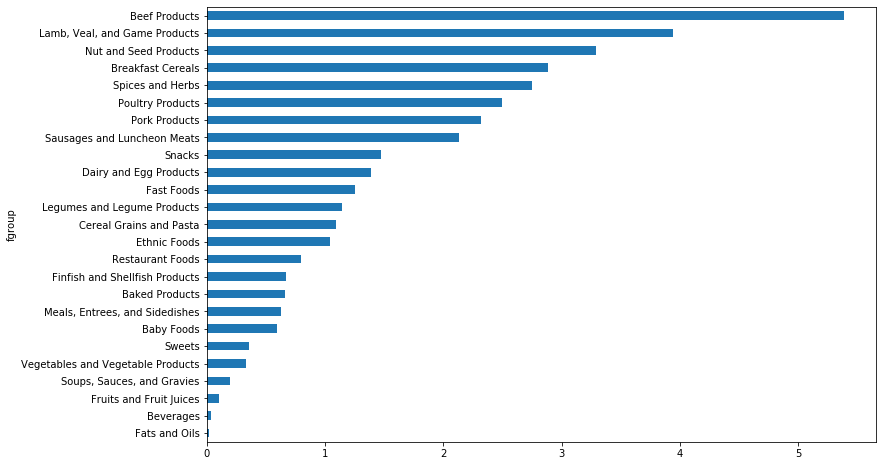

In [134]:
result['Zinc, Zn'].sort_values().plot(kind='barh', figsize = (12, 8))

# bhrh 스타일로 그래프를 만드는데 밸류값 기준 내림차순으로 Zinc, Zn 컬럼의 값을 나타낸다.

In [135]:
# 좀 더 응용하면 각 영양소가 어떤 음식에 가장 많이 들어 있는지 찾아볼 수도 있다.

In [143]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
# nutgroup 과 nutrient 를 groupby 하여 by_nutrient 변수에 할당한다.
print(by_nutrient)

get_maximum = lambda x: x.loc[x.value.idxmax()]
# x.value의 최대값의 인덱스로 구해서 loc 으로 그 행을 잘라서 get_maximum 변수에 할당한다.
# 최대값 구하기 
# df.loc[행 인덱싱값]
# df.loc[행 인덱싱값, 열 인덱싱값]

get_minimum = lambda x: x.loc[x.value.idxmin()]
# x.value의 최소값의 인덱스로 구해서 loc 으로 그 행을 잘라서 get_minimum 변수에 할당한다.

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]
# 위에 구한 값 by_nutrient 의 값을 get_maximum 으로 하나씩 넣어서
# 그 중 value 와 food 컬럼만 따로 뺴내어 max_foods 변수에 할당한다.


# 음식의 종류를 제한하자
max_foods.food = max_foods.food.str[:50]
# max_foods 의 문자를 50개로 제한한다.

In [137]:
# 위 코드의 결과 DataFrame 을 이 책에 다 싣기에는 너무 방대하므로 
# 아미노산에 대한 내용만 싣겠다.

In [145]:
max_foods.loc['Amino Acids']['food']
# Amini Acids 에 있는 food 행 값을 잘라 가져온다.

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 